<a href="https://www.kaggle.com/code/sagarcharaniya/rice-new-train-100-test-96?scriptVersionId=121452027" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Load Imp Library's 

In [1]:
import pandas as pd   # Load Data (Image's)
import numpy as np    # Data Convert
import glob           # Open Folder 
import os             # For Work With Local OS System
from PIL import Image # For Open Image File

# Loading Image Data & Store In Variabel

In [2]:
## Load All Images in Variable
images = glob.glob("/kaggle/input/rice-singal-new/Rice_sin_New/*.jpg")

all_images = []

## open And Convort Image to Array & Store In Variable
for i in images:
    open_img = Image.open(i)
    conv_img = np.array(open_img)
    all_images.append(conv_img)

In [3]:
## Chaking Shape Of Image Data
## All Image Are in Data Should Be Same Shape
all_images[0].shape

(250, 250, 3)

# Loading Image Lable To Variabel

In [4]:
# Loading Image Label To variabel
image_lable = []
for i in images:
    open_img = Image.open(i)
    image_lable.append(os.path.split(i)[-1][:7])

In [5]:
image_lable[118:122] # We have 5 Diffrent Type's of Rice,, we are seeling here two of them  [[["basmati" , "Ipsala"]]]

['Ipsala ', 'Ipsala ', 'Jasmine', 'Ipsala ']

# Trying To Reshaping Image(Array Matrix of 250 x 250 x 3) To 1D (1,87,500 x 1) To Create DataFrame & Spliting Data

In [6]:
## Reshaping 3D To 1D
reshaping_image_1d = np.array(all_images).reshape(300,-1)

In [7]:
## Creating DataFtame
image_dataframe = pd.DataFrame(reshaping_image_1d)

In [8]:
# Here Over Image Data To 1D with Frame
image_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,187490,187491,187492,187493,187494,187495,187496,187497,187498,187499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# We Had Image Lable Now We Adding Into Data Set To Understad Which Image Belong To Which Label

In [9]:
## adding Label into DataFrame
image_dataframe['Target'] = image_lable

In [10]:
image_dataframe['Target'][118:122]

118    Ipsala 
119    Ipsala 
120    Jasmine
121    Ipsala 
Name: Target, dtype: object

In [11]:
# Here Over Image Data with Label
image_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,187491,187492,187493,187494,187495,187496,187497,187498,187499,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jasmine
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad


## We are Trying To shuffle Data With Sample  -- Also You Can Use Library To shuffle

In [12]:
## Here We Have 300 Data   0 to 299 we are shuffle with 299
image_dataframe = image_dataframe.sample(300,replace=False).reset_index(drop=True)

# Spliting Data in Train & Testing

In [13]:
image_dataframe

,0,1,2,3,4,5,6,7,8,9,...,187491,187492,187493,187494,187495,187496,187497,187498,187499,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jasmine
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jasmine
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ipsala
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jasmine
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati


In [14]:
## Traing Data == 250
x_train = image_dataframe.iloc[:,:-1][:250]
y_train = image_dataframe.iloc[:,-1][:250]

## Testing Data == 49
x_test = image_dataframe.iloc[:,:-1][250:]
y_test = image_dataframe.iloc[:,-1][250:]

In [15]:
# print(x_train)   ## == 250 Image
# print(y_train)   ## == 250 Label

# print(x_test)    ## == 50 Image
# print(y_test)    ## == 50 Label

## We are Converting Again  DataFrame To array (We Have Train And Test Data)

In [16]:
# X Train & X Test To array
x_train_array = np.array(x_train)   # only 250 img
x_test_array = np.array(x_test)     # only 50 img

# Lable Are Set not Need to convert till Last

# Let's Rehape Again 1D Data To 3D Data 

In [17]:
# Reshaping 1D To 3D With Traing & Testing set of 250 Img & 50 Img

x_train_3d = x_train_array.reshape(250,250,250,3)
x_test_3d = x_test_array.reshape(50,250,250,3)

# Vizulation Rice Image

Label:- Karacad


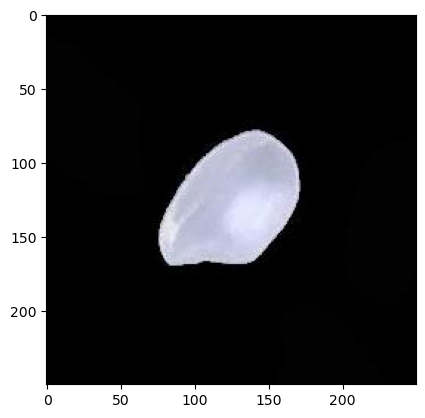

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

i = 144
image = x_train_3d[i]
label = y_train[i]
print(f'Label:- {label}')
plt.imshow(image);

In [19]:
# Now We Are Createing Dummy to Label 
# ['Arborio' == 0 , 'Ipsala' == 1 , 'Jasmine' == 2 , 'Karacadag' == 3 , 'basmati' == 4]

# y_train[50]  #== Arborio  == 0
# y_train[16]  #== Ipsala   == 1
# y_train[10]  #== Jasmine  == 2
# y_train[5]   #== Karacad  == 3
# y_train[0]   #== basmati  == 4

# Now We Are Createing Dummy to Label

In [20]:
from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()

y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

print(y_train.shape)
print(y_test.shape)

(250, 5)
(50, 5)


In [21]:
# y_train[50]  #== Arborio  == 0
# y_train[16]  #== Ipsala   == 1
# y_train[10]  #== Jasmine  == 2
# y_train[5]   #== Karacad  == 3
# y_train[0]   #== basmati  == 4

In [22]:
## Chaking For Loading Input Size for Inputing in Model
x_train_3d.shape[1:]

(250, 250, 3)

# Loading TF Keras & Billding Model

In [23]:
from tensorflow.keras import models, layers, optimizers

In [24]:
batch_size = None
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), padding='same', activation="relu", input_shape=x_train_3d.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

# 1D  Input Image Layer
model.add(layers.Flatten())

# Hidden Layer's
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(64, activation="relu"))

# softmax
model.add(layers.Dense(5, activation="softmax"))

# Model Summary

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

# Creating Adam Optimizer & Adding Learning Rate 

In [26]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Accuracy , Loss & Adam Opt. Compileing To Model  

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Normalizing Data 

In [28]:
x_train_3d_norm = x_train_3d.astype('float32') # Conversion to float type from integer type.
x_test_3d_norm = x_test_3d.astype('float32')
x_train_3d_norm /= 255.0 # Division by 255
x_test_3d_norm /= 255.0

# Creating Variable To ModelCheckpoint & EarlyStopping for Stop Model If Accuracy repeting same 10 Times, & Saving Model With Best Accuracy

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value.
#Hence saving the best weights occurred during training

model_checkpoint = ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=True,
                                   mode='auto',
                                   period=1)

# Reshaping Data For Making Sure Before Giving To Model ...

In [30]:
x_train_final = x_train_3d_norm.reshape(x_train_3d_norm.shape[0], 250, 250, 3)
x_test_final = x_test_3d_norm.reshape(x_test_3d_norm.shape[0], 250, 250, 3)
print(x_train_final.shape)
print(x_test_final.shape)

(250, 250, 250, 3)
(50, 250, 250, 3)


In [31]:
y_train[0]

array([0, 0, 0, 1, 0])

In [32]:
## for Model Input 
batch_size = 32
epochs = 20

# Ready To Run Model

In [33]:
history = model.fit(x_train_final,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test_final, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 1.4089 - accuracy: 0.4280
Epoch 1: val_loss improved from inf to 0.85965, saving model to cifar_cnn_checkpoint_01_loss0.8596.h5
8/8 [==============================] - 17s 203ms/step - loss: 1.4089 - accuracy: 0.4280 - val_loss: 0.8596 - val_accuracy: 0.7000
Epoch 2/20
7/8 [=========================>....] - ETA: 0s - loss: 0.6750 - accuracy: 0.7277
Epoch 2: val_loss improved from 0.85965 to 0.41276, saving model to cifar_cnn_checkpoint_02_loss0.4128.h5
8/8 [==============================] - 0s 56ms/step - loss: 0.6516 - accuracy: 0.7400 - val_loss: 0.4128 - val_accuracy: 0.8400
Epoch 3/20
7/8 [=========================>....] - ETA: 0s - loss: 0.3076 - accuracy: 0.8661
Epoch 3: val_loss improved from 0.41276 to 0.14841, saving model to cifar_cnn_checkpoint_03_loss0.1484.h5
8/8 [==============================] - 0s 60ms/step - loss: 0.2945 - accuracy: 0.8760 - val_loss: 0.1484 - val_accuracy: 0.9800
Epoch 4/20
7/8 [========

In [34]:
# Vizulation Lost Fun With Train & Test

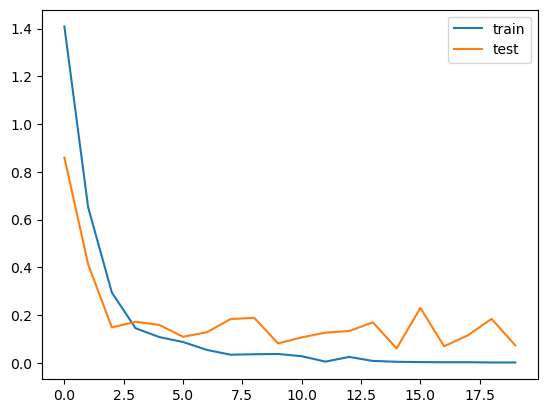

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()